In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('/Users/mogarcia/Documents/Maestría_MCD/2do_semestre/Arquitectura_de_datos/bookish-journey-main/test')

In [3]:
base = pd.read_csv('ingredientes.csv')
print(base.shape)
base.head(10)

(425, 17)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,11002,Long Island Tea,Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000,Mojito,Light rum,Lime,Sugar,Mint,Soda water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11001,Old Fashioned,Bourbon,Angostura bitters,Sugar,Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11003,Negroni,Gin,Campari,Sweet Vermouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11004,Whiskey Sour,Blended whiskey,Lemon,Powdered sugar,Cherry,Lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11007,Margarita,Tequila,Triple sec,Lime juice,Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11006,Daiquiri,Light rum,Lime,Powdered sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11005,Dry Martini,Gin,Dry Vermouth,Olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11008,Manhattan,Sweet Vermouth,Bourbon,Angostura bitters,Ice,Maraschino cherry,Orange peel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11020,Algonquin,Blended whiskey,Dry Vermouth,Pineapple juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idDrink          425 non-null    int64  
 1   strDrink         425 non-null    object 
 2   strIngredient1   425 non-null    object 
 3   strIngredient2   425 non-null    object 
 4   strIngredient3   361 non-null    object 
 5   strIngredient4   230 non-null    object 
 6   strIngredient5   141 non-null    object 
 7   strIngredient6   62 non-null     object 
 8   strIngredient7   16 non-null     object 
 9   strIngredient8   4 non-null      object 
 10  strIngredient9   2 non-null      object 
 11  strIngredient10  1 non-null      object 
 12  strIngredient11  1 non-null      object 
 13  strIngredient12  0 non-null      float64
 14  strIngredient13  0 non-null      float64
 15  strIngredient14  0 non-null      float64
 16  strIngredient15  0 non-null      float64
dtypes: float64(4), i

In [5]:
base=base.drop(['strIngredient12','strIngredient13','strIngredient14','strIngredient15'],axis=1)

In [6]:
base=base.drop_duplicates()
print(base.shape)

(425, 13)


In [7]:
base=base.replace(np.nan,"")

In [8]:
base['ingredients']=base[['strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5',
        'strIngredient6','strIngredient7','strIngredient8','strIngredient9','strIngredient10','strIngredient11']].agg(','.join, axis=1)
base.ingredients

0       Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,,,,,
1             Light rum,Lime,Sugar,Mint,Soda water,,,,,,
2           Bourbon,Angostura bitters,Sugar,Water,,,,,,,
3                     Gin,Campari,Sweet Vermouth,,,,,,,,
4      Blended whiskey,Lemon,Powdered sugar,Cherry,Le...
                             ...                        
420                     Vodka,Kahlua,Sugar syrup,,,,,,,,
421           Baileys irish cream,Kahlua,Sambuca,,,,,,,,
422                                  Vodka,Ouzo,,,,,,,,,
423     Southern Comfort,Triple sec,Lime,Sour mix,,,,,,,
424    Orange Bitters,Green Chartreuse,Gin,Sweet Verm...
Name: ingredients, Length: 425, dtype: object

In [12]:
#función para convertir el texto en minúsculas
def lower(text):
    text=text.lower()
    return text

In [13]:
ingredients_low=[]
for i in base.ingredients:
    il=lower(i)
    ingredients_low.append(il)

In [14]:
base['ingredients']=ingredients_low
base.ingredients

0       vodka,light rum,gin,tequila,lemon,coca-cola,,,,,
1             light rum,lime,sugar,mint,soda water,,,,,,
2           bourbon,angostura bitters,sugar,water,,,,,,,
3                     gin,campari,sweet vermouth,,,,,,,,
4      blended whiskey,lemon,powdered sugar,cherry,le...
                             ...                        
420                     vodka,kahlua,sugar syrup,,,,,,,,
421           baileys irish cream,kahlua,sambuca,,,,,,,,
422                                  vodka,ouzo,,,,,,,,,
423     southern comfort,triple sec,lime,sour mix,,,,,,,
424    orange bitters,green chartreuse,gin,sweet verm...
Name: ingredients, Length: 425, dtype: object

In [33]:
#función para tokenizar
def words(df):
    words=[]
    for i in range(425):
        p=base.ingredients[i].split(",")
        words=p+words
    return words

In [19]:
Ingredients=words(base)

['orange bitters',
 'green chartreuse',
 'gin',
 'sweet vermouth',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'southern comfort',
 'triple sec',
 'lime',
 'sour mix',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'vodka',
 'ouzo',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'baileys irish cream',
 'kahlua',
 'sambuca',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'vodka',
 'kahlua',
 'sugar syrup',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'vodka',
 'amaretto',
 'sloe gin',
 'triple sec',
 'cranberry juice',
 '',
 '',
 '',
 '',
 '',
 '',
 'gin',
 'triple sec',
 'lemon juice',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'prosecco',
 'campari',
 'soda water',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'goldschlager',
 'butterscotch schnapps',
 'milk',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'vodka',
 'kahlua',
 'coca-cola',
 'guinness stout',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'dry vermouth',
 'gin',
 'benedictine',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'vermouth',
 'maraschino cherry',
 'sugar syrup',
 'le

In [20]:
#función para la frecuencia de los ingredientes
def frecuencia(lista):
    dic={}
    for palabra in lista:
        if palabra in dic.keys():
            dic[palabra]=dic[palabra]+1
        else:
            dic[palabra]=1
    return dic 

In [23]:
conteo=frecuencia(Ingredients)
conteo_dic=dict(sorted(conteo.items(),key=lambda item:item[1], reverse=True))
#conteo_dic

In [28]:
ingredients_df=pd.DataFrame.from_dict(conteo_dic,orient='index').rename(columns={0:'freq'})
ingredients_df


,freq
,3007
gin,81
vodka,64
sugar,51
lemon juice,50
...,...
pink lemonade,1
cream of coconut,1
peach brandy,1
mint syrup,1


In [30]:
ingredients_df=ingredients_df[1:]

# Top 20 ingredients 

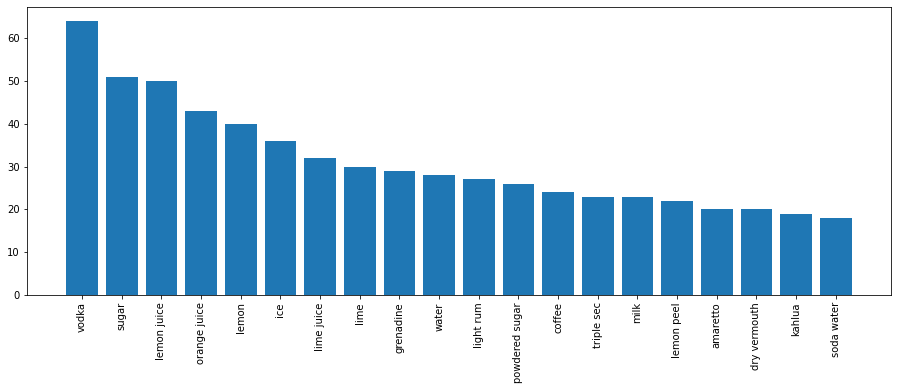

In [32]:
def plot_bar(ingredients_df, top=20):
    fig=plt.figure()
    ax=fig.add_axes([0,0,2,1])
    ax.bar(x=ingredients_df.iloc[:top,:].index, height=ingredients_df.iloc[:top,0].values)
    plt.xticks(rotation=90)
    plt.show()

plot_bar(ingredients_df,20)